# 2. Principal Component Analysis - PCA

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.

It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

## 1. Import Dependencies

In [94]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## 2. Load the Data

In [95]:
# Load the X_train dataset
X_train = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/3_train_normalized.csv")
X_train.tail(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
1547,0.699120,0.702750,0.039689,0.039689,0.000649,0.001914,0.000661,0.000979,0.551020,0.407407,...,0.009263,0.584923,1.000000,0.5,0.348844,0.293138,0.261559,0.499823,0.521763,0.195687
1548,0.008211,0.011703,0.010965,0.010966,0.000970,0.000957,0.001157,0.001493,0.505102,0.476852,...,0.005032,0.830864,1.000000,1.0,0.384029,0.252064,0.315214,0.774903,0.533884,0.280704
1549,0.360704,0.361615,0.168054,0.168054,0.000360,0.001053,0.000771,0.000544,0.545918,0.416667,...,0.004117,0.531757,1.000000,1.0,0.297970,0.196206,0.276164,0.768800,0.523003,0.105108
1550,0.129032,0.131656,0.237864,0.237864,0.000341,0.000766,0.000496,0.000503,0.530612,0.402778,...,0.004346,0.898539,1.000000,1.0,0.293157,0.235549,0.234813,0.550260,0.510675,0.086720
1551,0.482111,0.490345,0.062705,0.062706,0.001978,0.002680,0.001488,0.002911,0.433673,0.444444,...,0.015096,0.661830,0.962484,1.0,0.446863,0.360607,0.336112,0.630605,0.505579,0.806924


In [96]:
y_train = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/5_train_targets.csv")
y_train_data = y_train.values.flatten()
y_train.tail(5)

,Defect_Type
1547,Bumps
1548,Other_Faults
1549,Dirtiness
1550,Other_Faults
1551,Bumps


## 3. PCA

In [119]:
X_train_pca = PCA(n_components=2)
X_train_pca_data = X_train_pca.fit_transform(X_train)

print('Explained variation per principal component: {}'.format(X_train_pca.explained_variance_ratio_))

Explained variation per principal component: [0.34060838 0.20498027]


In [120]:
pca_df = pd.DataFrame(data = X_train_pca_data
             , columns = ['principal component 1', 'principal component 2'])

pca_df['y'] = y_train

pca_df.tail()

,principal component 1,principal component 2,y
1547,-0.227548,-0.267097,Bumps
1548,-0.307237,-0.579694,Other_Faults
1549,-0.173271,-0.754933,Dirtiness
1550,-0.153693,-0.476370,Other_Faults
1551,-0.380828,-0.606644,Bumps


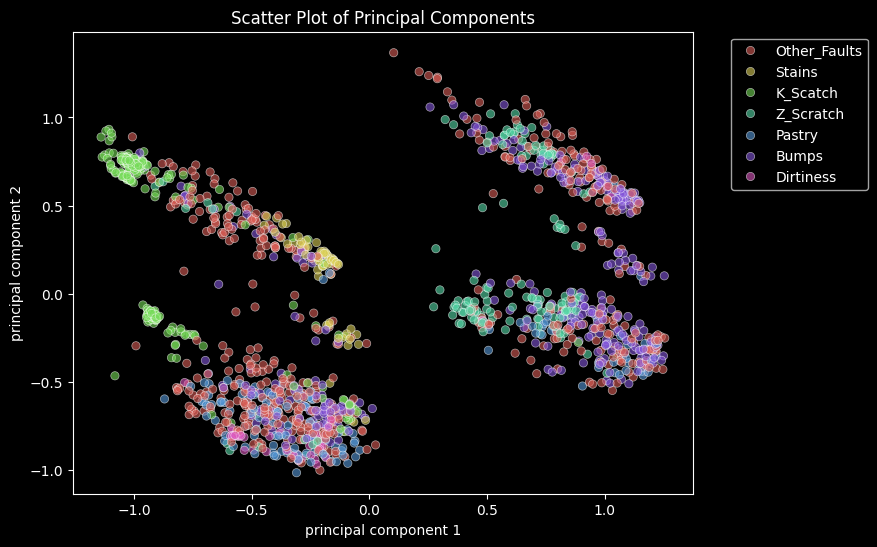

In [121]:
# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", len(np.unique(y_train))),
    data=pca_df,
    legend="full",
    alpha=0.6
)
plt.style.use("dark_background")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatter Plot of Principal Components')
plt.show()


## 4. Machine Learning with PCA Data

In [125]:
# Load test features
X_test = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/4_test_normalized.csv")
X_test_pca = PCA(n_components=2)
X_test_pca_data = X_test_pca.fit_transform(X_test)

In [126]:
# load train features
y_test = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/6_test_targets.csv")
y_test_data = y_test.values.flatten()

In [127]:
# Randon Forest Definition
rf = RandomForestClassifier()
rf.fit(X_train_pca_data, y_train_data)

# Predict
y_pred = rf.predict(X_test_pca_data)

# Evaluate the performance
print(classification_report(y_test_data, y_pred))

              precision    recall  f1-score   support

       Bumps       0.40      0.42      0.41        72
   Dirtiness       0.14      0.12      0.13         8
    K_Scatch       0.86      0.83      0.85        83
Other_Faults       0.51      0.63      0.56       143
      Pastry       0.29      0.21      0.24        29
      Stains       0.50      0.69      0.58        13
   Z_Scratch       0.55      0.15      0.23        41

    accuracy                           0.54       389
   macro avg       0.46      0.44      0.43       389
weighted avg       0.54      0.54      0.53       389

